In [3]:
import numpy as np
import sklearn.datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier #回归
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap #绘图引用模块
from sklearn.externals import joblib
from sklearn.decomposition import PCA #特征处理，降维

/home/carbon13/miniconda2/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
path = r'/home/carbon13/machine_learning_study_follow_yincheng-master/MNIST_img/trainimage/pic2/'

In [52]:
x=[]
for j in range(10):
    for i in range(1,5001):
        x.append(plt.imread(path +'%d'%(j)+ '/%d.bmp'%(i)))
x

[array([[[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255]],
 
        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255]],
 
        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255]],
 
        ...,
 
        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255]],
 
        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
    

In [30]:
y =[]
for i in range(1,5923):
    y.append(0)

In [7]:
x_train =[]
x_test =[]
y_train = []
y_test = []
for i in range(10):
    for j in range(1,5001):
        if j<4500:
            x_train.append(plt.imread(path +'%d'%(i)+ '/%d.bmp'%(j)).reshape(-1))
            y_train.append(i)
        else:
            x_test.append(plt.imread(path +'%d'%(i)+ '/%d.bmp'%(j)).reshape(-1))
            y_test.append(i)

In [8]:
len(x_train)

44990

In [10]:
len(x_test)

5010

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
x_train.shape

(44990, 3136)

In [78]:
math.sqrt(3136)

56.0

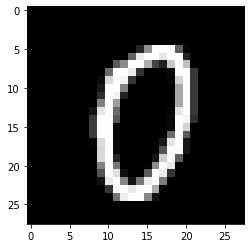

In [13]:
num = x_train[1].reshape((28,28,4))
plt.imshow(num,cmap='gray')

In [14]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_predict = knn.predict(x_test[1587:1595])

In [25]:
y_predict

array([3, 3, 3, 3, 3, 3, 3, 3])

In [26]:
y_test[1587:1595]

array([3, 3, 3, 3, 3, 3, 3, 3])

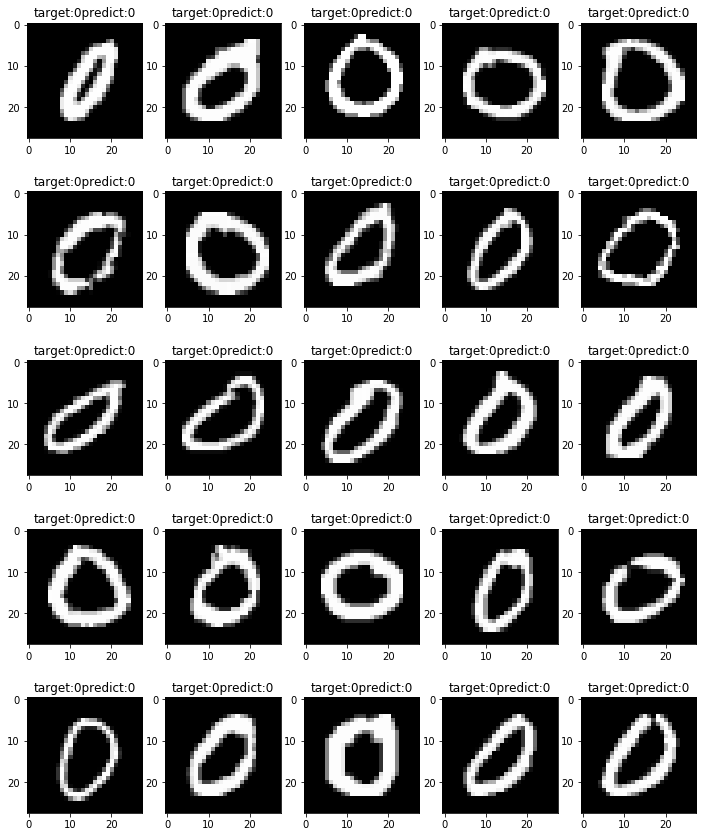

In [31]:
plt.figure(figsize=(12,15))
im_datas=x_test[::10]
im_target=y_test[::10]
im_predict=knn.predict(x_test[::10])
for i in range(25):
    plt.subplot(5,5,(i+1))
    plt.imshow(im_datas[i].reshape(28,28,4))
    plt.title('target:%d'%(im_target[i])+'predict:%d'%(im_predict[i]))